# **JUDUL NYA APA YA GW LUPA**

## I. Introduction

### *Boleh nih Do kalo lo mau rubah templatenyaa, silahkan. Template dibawah yang biasanya gw pake aja di Milestone gw.*

- Group 04
- Group Members: Ronaldo Syahputra, Titian F. Prasasti, Daniel Satria, Prabaningrum H.B., Radyatra Sidharta
- Batch: 001-HCK

### *Taro intro di sini bolehh*

### a. Table of Content
- I. Introduction
    - a. Table of Content
    - b. Problem Description
    - c. Objective
    - d. Problem Statement

- II. Library Import

- III. Data Loading

- IV. Exploratory Data Analysis (EDA)
    - a. Dataset Summary
    - b. Not-a-Number Handling
    - c. Duplication
    - d. Creating New Dataframe
    - e. Modifying Target Class

- V. Data Preprocessing
    - a. Feature Selection
    - b. Class Balancing
    - c. Dataset Splitting
    - d. Outlier Handling
    - e. Preprocessing Pipeline

- VI. Machine Learning Model
    - a. Random Forest
    - b. Decision Tree
    - c. AdaBoost
    - d. LightGBM
    - e. XGBoost  

- VII. Model Inference

- VIII. Model Saving

- IX. Conclusion & Recommendation

### b. Problem Description


### c. Objective


### d. Problem Statement

## II. Library Import

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# For EDA
from statistics import mode

# For Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# For Feature Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# For Feature Scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# For Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

# To Evaluate and Improve Models
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

np.random.seed(42)
tf.random.set_seed(42)

## III. Data Loading

In [2]:
# Loading the csv file using pd.read.
df = pd.read_csv('loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


The dataset we have here is that gathered from a sources surrounding the Loaning industry in the United States of America. Although more intricate then what we can find here in Indonesia, the dataset still provides a unique insight on what is under deliberation when it comes to loaning, the advantages and disadvantages of the loaning process in the US compared to Indonesia, and what additions or improvements could be provided nationwide in the future.

As displayed in the table above, we understand that there are about 880 thousand data samples in our dataset, with a corresponding 74 columns representing variables that may or may not be important for our model. The information present includes the account information of the loanees, as well as their financial and transaction history, followed by their loan information.

## IV. Exploratory Data Analysis (EDA)

The Exploratory Data Analysis is done in conjunction with the Excel file entitled "Feature Selection_Details" in the "Excel Files" folder as part of the elaborate and detailed dive into our dataset. There, each of our columns are examined for their attributes, focusing mostly on their type, Not-a-Number (NaN) count, description, and other corresponding information. This analysis will then contribute to the Feature Selection decision which we will undertake in the following chapters. 

Columns included in our dataset are that of our independent variables (henceforth called "Features") and dependent variable (henceforth called "Target"). To elaborate, columns beside "loan_status" is considered to be the features in our data. In the EDA, the manipulation of the dataset will not be done, rather we will only be cleaning it. This cleaning process includes the removal of NaNs / Nulls, duplicates, among other things.

### a. Dataset Summary

### b. Not-a-Number (NaN) Detection

Detecting and removing NaNs is a crucial first step to enable the working of our model. The reasoning behind this is because a Machine Learning model would only be able to train on numerical data. Hence, our model would not be able to process a NaN value. 

In [4]:
# Syntax for detecting the NaNs in our dataset.
df.isnull().sum().sort_values(ascending=False).head(45)

dti_joint                      886870
annual_inc_joint               886868
verification_status_joint      886868
il_util                        868762
mths_since_rcnt_il             866569
open_acc_6m                    866007
open_il_6m                     866007
open_il_12m                    866007
open_il_24m                    866007
total_bal_il                   866007
inq_last_12m                   866007
open_rv_12m                    866007
open_rv_24m                    866007
max_bal_bc                     866007
all_util                       866007
inq_fi                         866007
total_cu_tl                    866007
desc                           761351
mths_since_last_record         750326
mths_since_last_major_derog    665676
mths_since_last_delinq         454312
next_pymnt_d                   252971
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_title                       51462
emp_length  

From the information above, we can understand that several features in our dataset, about 40 to be exact, have NaNs in them. However, working together with aforementioned Excel file containing details on our features, we can determine which of them to drop and which to retain. Nevertheless, for extra precaution, we would also be conducting another search for NaN values. In this case, we will be looking for specific NaN values that cannot be detected by the syntax above.

In [5]:
# Additional forms of anomalies that we need to detect in our dataset.
anomalous_entries = {}

for x in list(df.columns):
    anomalous_entries[x] = 0
    for y in df[x]:
        if y in ['NaN', 'N/A', '--', '-', 'Null', '?', ' ']: # These are the specific NaN values we will be looking for.
            anomalous_entries[x] = anomalous_entries[x] + 1

anomalous_entries

{'id': 0,
 'member_id': 0,
 'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'pymnt_plan': 0,
 'url': 0,
 'desc': 246,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'addr_state': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 0,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 0,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 0,
 'last_credit_pull_d': 0,
 'collections_12_mths_ex_med': 0,
 'mths_since_last_major_dero

Here, we observe that only the feature "desc" have such anomalies mentioned above. However, looking closely, we can ascertain that this column is not a feature, but rather bears irrelevant information to our target. There are other columns in our dataset that serves as a label or as the same purpose as "desc". Therefore, we will be removing them later on during Feature Selection in the Data Processing process.

In [49]:
df_nn = df[['collection_recovery_fee', 'application_type', 'policy_code', 'last_pymnt_amnt', 'id', 'recoveries', 'pymnt_plan', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'url', 'total_rec_late_fee', 'purpose', 'zip_code',
'addr_state', 'dti', 'revol_bal', 'initial_list_status', 'out_prncp', 'member_id', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'out_prncp_inv']]

In [50]:
df_nn.drop(columns=['id', 'url', 'zip_code', 'addr_state', 'total_pymnt_inv', 'out_prncp_inv'], inplace=True, axis=1)

In [51]:
df_nn.head().T

,0,1,2,3,4
collection_recovery_fee,0.0,1.11,0.0,0.0,0.0
application_type,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL
policy_code,1.0,1.0,1.0,1.0,1.0
last_pymnt_amnt,171.62,119.66,649.91,357.48,67.79
recoveries,0.0,117.08,0.0,0.0,0.0
pymnt_plan,n,n,n,n,n
loan_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
term,36 months,60 months,36 months,36 months,60 months


In [52]:
df_nn['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [53]:
df_nn.replace({'Fully Paid' : 0, 'Charged Off' : 1, 'Current':0, 'Default':1,
       'Late (31-120 days)' : 1, 'In Grace Period':0, 'Late (16-30 days)':0,
       'Does not meet the credit policy. Status:Fully Paid': 0,
       'Does not meet the credit policy. Status:Charged Off': 1, 'Issued':0}, inplace=True)

In [54]:
df_nn.head().T

,0,1,2,3,4
collection_recovery_fee,0.0,1.11,0.0,0.0,0.0
application_type,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL
policy_code,1.0,1.0,1.0,1.0,1.0
last_pymnt_amnt,171.62,119.66,649.91,357.48,67.79
recoveries,0.0,117.08,0.0,0.0,0.0
pymnt_plan,n,n,n,n,n
loan_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
term,36 months,60 months,36 months,36 months,60 months


In [58]:
df_feature = df_nn[['collection_recovery_fee', 'application_type', 'policy_code',
       'last_pymnt_amnt', 'recoveries', 'pymnt_plan', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'total_rec_late_fee', 'purpose', 'dti',
       'revol_bal', 'initial_list_status', 'out_prncp', 'member_id',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int']]

In [59]:
df_target = df_nn['loan_status']

### c. Duplication Handling

Aside from finding NaNs in our dataset, it is equally important that we look for duplications as well. Removing duplicates in our data will decrease the noise, and hence, the margin of error of our model, improving performance.

In [ ]:
# Detecting duplicates in our data.
df_dupl = df.duplicated()
df_dupl.sort_values(ascending=False) 

0         False
591590    False
591579    False
591580    False
591581    False
          ...  
295796    False
295797    False
295798    False
295799    False
887378    False
Length: 887379, dtype: bool

From the information above, we could ascertain that there no duplicates in our data.

### d. Class Balance Visualization

Class Balance:  Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


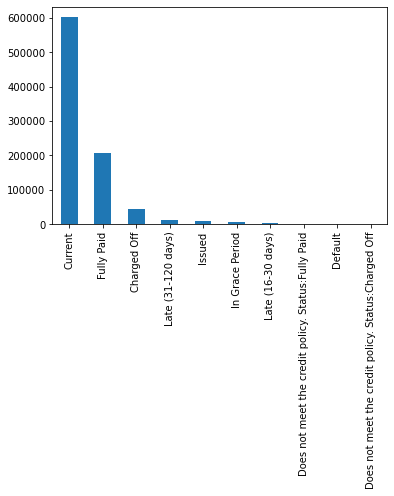

In [84]:
df['loan_status'].value_counts().plot(kind='bar')
print("Class Balance: ", df['loan_status'].value_counts())

## V. Data Preprocessing

In [87]:
df_train, df_test = train_test_split(df2, train_size=0.8, stratify=df2['loan_status'], random_state=42)

In [88]:
df_train['loan_status'].value_counts()

0    583186
1     35988
Name: loan_status, dtype: int64

In [89]:
df_test['loan_status'].value_counts()

0    145797
1      8997
Name: loan_status, dtype: int64

### a. Feature Selection

In [ ]:
df1 = df[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length', 'revol_util', 'delinq_2yrs', 'inq_last_6mths',
'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'collection_recovery_fee', 'application_type', 'last_pymnt_amnt', 'recoveries', 'pymnt_plan',
'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
'total_rec_late_fee', 'purpose', 'revol_bal', 'initial_list_status', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'out_prncp_inv', 'loan_status']]

In [ ]:
df_nominal = df1[['application_type', 'term', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']]
df_ordinal = df1[['emp_length', 'grade', 'sub_grade']]
df_num = df1[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'delinq_2yrs', 'inq_last_6mths',
'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq', 'collection_recovery_fee', 'last_pymnt_amnt', 'recoveries', 'pymnt_plan',
'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
'total_rec_late_fee', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
'out_prncp_inv', 'loan_status']]

In [ ]:
df_num.replace({'Fully Paid' : 0, 'Charged Off' : 1, 'Current':0, 'Default':1,
       'Late (31-120 days)' : 1, 'In Grace Period':0, 'Late (16-30 days)':0,
       'Does not meet the credit policy. Status:Fully Paid': 0,
       'Does not meet the credit policy. Status:Charged Off': 1, 'Issued':0}, inplace=True)

In [ ]:
scaler = MinMaxScaler
ordinal_encoder = OrdinalEncoder()
nominal_encoder = OneHotEncoder()

In [ ]:
df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_ordinal))
df_ordinal_encoded

In [ ]:
df_nominal_encoded = pd.DataFrame(nominal_encoder.fit_transform(df_nominal).toarray())
df_nominal_encoded

In [ ]:
df1['application_type'].unique()

In [ ]:
df1['term'].unique()

In [ ]:
df1['home_ownership'].unique()

In [ ]:
df1['verification_status'].unique()

In [ ]:
df1['purpose'].unique()

In [ ]:
df1['initial_list_status'].unique()

In [ ]:
df_nominal_encoded.columns = ['columns_1', 'columns_2', 'columns_3', 'columns_4', 'columns_5', 'columns_6', 'columns_7', 'columns_8', 
'columns_9', 'columns_10', 'columns_11', 'columns_12', 'columns_13', 'columns_14', 'columns_15', 'columns_16', 'columns_17', 'columns_18', 'columns_19', 'columns_20', 'columns_21', 'columns_22', 'columns_23', 'columns_24', 'columns_25', 'columns_26', 'columns_27', 'columns_28', 'columns_29' ]

In [ ]:
df_full = pd.concat([df_num,df_ordinal_encoded,df_nominal_encoded], axis=1)
df_full.dropna(inplace=True)
df_full.head().T

In [ ]:
df_full.replace({'n':0, 'y':1}, inplace=True)

In [ ]:
from sklearn.feature_selection import SelectKBest

K_best = SelectKBest(k=4)
train_K_best = K_best.fit(df_full.drop(columns='loan_status', axis=1), df_full['loan_status'])
K_best_scores = np.round_(train_K_best.scores_)

df_K_best_Scores = pd.Series(K_best_scores)
df_K_best_Scores.index = df_full.drop(columns='loan_status', axis=1).columns
df_K_best_Scores.sort_values(ascending=False)

In [ ]:
df1.drop(columns=['delinq_2yrs', 'acc_now_delinq', 'tot_coll_amt', 'pymnt_plan', 'funded_amnt_inv', 'loan_amnt', 'funded_amnt', 'application_type'], axis=1, inplace=True)

In [ ]:
df1.head().T

In [ ]:
df2 = df1.copy()
df2.shape

In [ ]:
df2['loan_status'].unique()

In [ ]:
df2.isnull().sum()

In [ ]:
df2.head().T

In [ ]:
df2['loan_status'].replace({'Fully Paid' : 0, 'Charged Off' : 1, 'Current':0, 'Default':1,
       'Late (31-120 days)' : 1, 'In Grace Period':0, 'Late (16-30 days)':0,
       'Does not meet the credit policy. Status:Fully Paid': 0,
       'Does not meet the credit policy. Status:Charged Off': 1, 'Issued':0}, inplace=True)

In [ ]:
nan_tot_cur_bal = df2[df2['tot_cur_bal'].isna()]
nan_tot_cur_bal['loan_status'].value_counts()

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.isnull().sum()

In [ ]:
df2['loan_status'].value_counts()

### b. Class Balancing

In [ ]:
df2['loan_status'].value_counts().plot(kind='bar')
print("Class Balance: ", df2['loan_status'].value_counts())

Class Balance:  0    50000
1    35988
Name: loan_status, dtype: int64


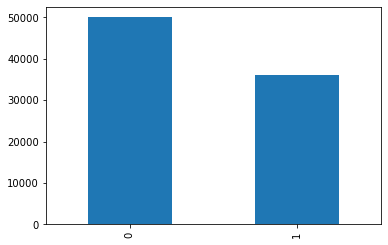

In [90]:
np.random.seed(42)

train_0 = df_train[df_train['loan_status']==0].sample(50000, replace=True)
train_1 = df_train[df_train['loan_status']==1]

df4_sampling = pd.concat([train_0, train_1])
df4_sampling = df4_sampling.sample(len(df4_sampling))

df4_sampling['loan_status'].value_counts().plot(kind='bar')
print("Class Balance: ", df4_sampling['loan_status'].value_counts())

### c. Splitting Dataset

In [91]:
X_train = df4_sampling.drop(['loan_status'], axis=1)
X_test = df_test.drop(['loan_status'], axis=1)

y_train = df4_sampling[['loan_status']]
y_test = df_test[['loan_status']]

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train.shape)
print('y_Test Size  : ', y_test.shape)

X_Train Size :  (85988, 28)
X_Test Size  :  (154794, 28)
y_Train Size :  (85988, 1)
y_Test Size  :  (154794, 1)


### d. Outlier Handling

In [380]:
df4_sampling.T

,647551,799583,59506,195292,341719,300510,615450,665707,202291,616873,...,681089,100077,193749,524119,515027,126566,401542,416765,232889,850273
tot_cur_bal,50015.0,18701.0,11683.0,5249.0,144169.0,36817.0,493014.0,305244.0,1277.0,14769.0,...,55967.0,222814.0,21617.0,774532.0,87771.0,59740.0,32435.0,376538.0,74413.0,383012.0
total_rev_hi_lim,37900.0,6300.0,12900.0,11494.0,17300.0,25800.0,140000.0,5075.0,17200.0,1600.0,...,38500.0,25600.0,16200.0,113400.0,53600.0,6900.0,25100.0,22000.0,8200.0,61900.0
emp_length,10+ years,< 1 year,10+ years,7 years,< 1 year,10+ years,4 years,10+ years,2 years,3 years,...,< 1 year,9 years,2 years,10+ years,4 years,1 year,2 years,10+ years,1 year,10+ years
revol_util,54.8,89.7,77.6,45.7,49.9,21.5,70.8,99.0,7.4,72.0,...,64.1,70.9,27.7,93.0,80.0,19.6,21.7,64.4,86.4,64.8
inq_last_6mths,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,...,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
open_acc,20.0,7.0,11.0,4.0,12.0,9.0,21.0,8.0,8.0,3.0,...,12.0,10.0,12.0,13.0,8.0,6.0,10.0,8.0,8.0,20.0
pub_rec,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
total_acc,25.0,15.0,22.0,7.0,29.0,16.0,35.0,12.0,12.0,6.0,...,44.0,22.0,13.0,28.0,16.0,28.0,24.0,22.0,13.0,40.0
collection_recovery_fee,0.0,0.0,0.0,2.5348,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,47.7491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_pymnt_amnt,525.28,778.63,301.91,121.46,48.96,126.07,774.91,209.79,1226.34,316.71,...,621.7,911.84,434.15,1220.33,566.88,88.86,282.48,700.54,200.41,1223.43


In [92]:
X_train_num = X_train.drop(['emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status'], axis=1)
X_train_ordinal = X_train[['emp_length', 'verification_status', 'grade', 'sub_grade']]
X_train_nominal = X_train[['home_ownership', 'purpose', 'initial_list_status']]

In [381]:
X_train_ordinal.T

,647551,799583,59506,195292,341719,300510,615450,665707,202291,616873,...,681089,100077,193749,524119,515027,126566,401542,416765,232889,850273
emp_length,10+ years,< 1 year,10+ years,7 years,< 1 year,10+ years,4 years,10+ years,2 years,3 years,...,< 1 year,9 years,2 years,10+ years,4 years,1 year,2 years,10+ years,1 year,10+ years
verification_status,Not Verified,Source Verified,Not Verified,Not Verified,Source Verified,Not Verified,Not Verified,Verified,Not Verified,Verified,...,Source Verified,Verified,Not Verified,Verified,Not Verified,Verified,Source Verified,Verified,Source Verified,Verified
grade,E,C,B,A,C,A,A,D,D,B,...,B,E,B,D,B,D,E,C,C,D
sub_grade,E1,C3,B5,A5,C1,A5,A4,D1,D3,B5,...,B4,E2,B4,D1,B2,D5,E2,C2,C1,D1


In [387]:
X_train_nominal.T

,647551,799583,59506,195292,341719,300510,615450,665707,202291,616873,...,681089,100077,193749,524119,515027,126566,401542,416765,232889,850273
home_ownership,OWN,RENT,OWN,RENT,MORTGAGE,RENT,OWN,MORTGAGE,RENT,RENT,...,MORTGAGE,MORTGAGE,OWN,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE
purpose,credit_card,credit_card,credit_card,debt_consolidation,home_improvement,credit_card,credit_card,other,other,credit_card,...,home_improvement,credit_card,credit_card,debt_consolidation,credit_card,other,debt_consolidation,debt_consolidation,credit_card,credit_card
initial_list_status,w,f,f,f,w,w,w,f,f,f,...,w,f,f,f,w,w,f,w,f,f


In [386]:
X_train_nominal['home_ownership'].unique()

array(['OWN', 'RENT', 'MORTGAGE', 'NONE', 'OTHER'], dtype=object)

In [93]:
X_train.shape

(85988, 28)

In [94]:
X_train_num.replace({' 36 months':36, ' 60 months':60}, inplace=True)

In [95]:
X_train_num.head().T

,647551,799583,59506,195292,341719
tot_cur_bal,50015.00,18701.00,11683.00,5249.0000,144169.00
total_rev_hi_lim,37900.00,6300.00,12900.00,11494.0000,17300.00
revol_util,54.80,89.70,77.60,45.7000,49.90
inq_last_6mths,0.00,0.00,0.00,0.0000,2.00
open_acc,20.00,7.00,11.00,4.0000,12.00
pub_rec,0.00,1.00,0.00,0.0000,0.00
total_acc,25.00,15.00,22.00,7.0000,29.00
collection_recovery_fee,0.00,0.00,0.00,2.5348,0.00
last_pymnt_amnt,525.28,778.63,301.91,121.4600,48.96
recoveries,0.00,0.00,0.00,253.4800,0.00


In [96]:
# Function to create histogram and boxplot.

def diagnostic_plots(X_train_num, variable):
    # Defining Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(X_train_num[variable])
    plt.title('Boxplot')

    plt.show()

    # Skewness
    print('\nSkewness Value : ', X_train_num[variable].skew())

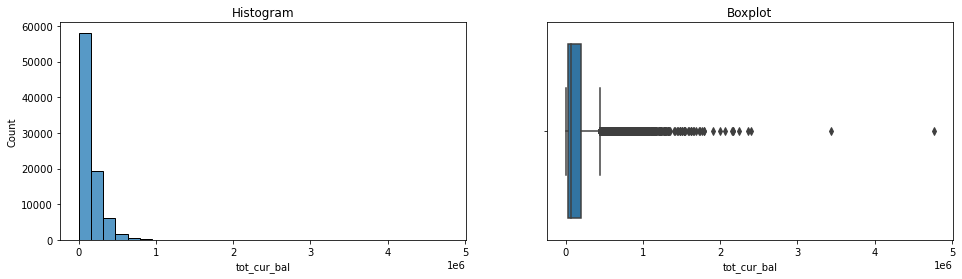


Skewness Value :  2.8863436620613334


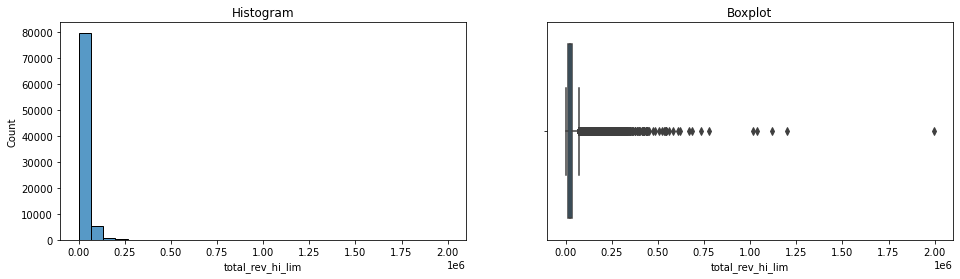


Skewness Value :  9.304085908260479


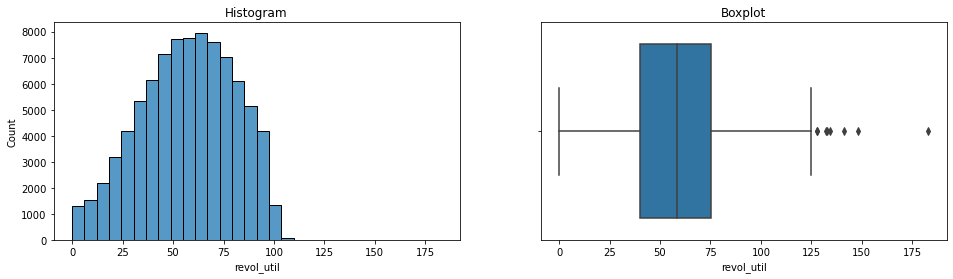


Skewness Value :  -0.22627182547766628


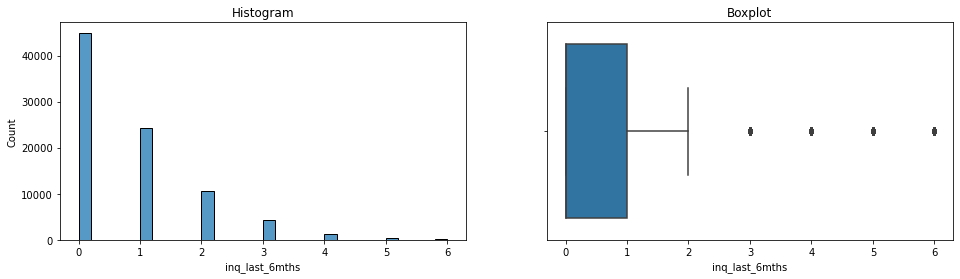


Skewness Value :  1.5546439375488867


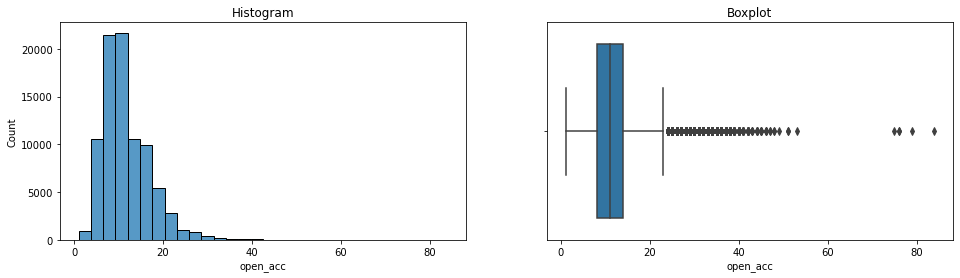


Skewness Value :  1.305363468346647


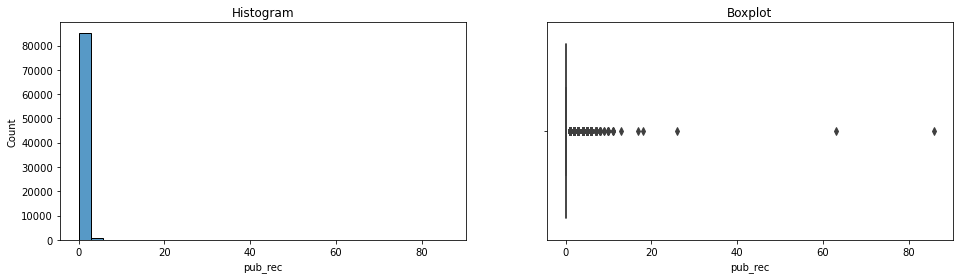


Skewness Value :  39.2103945242058


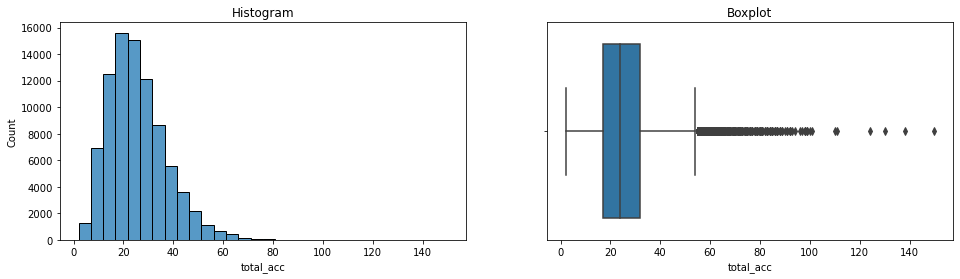


Skewness Value :  0.9119490257652765


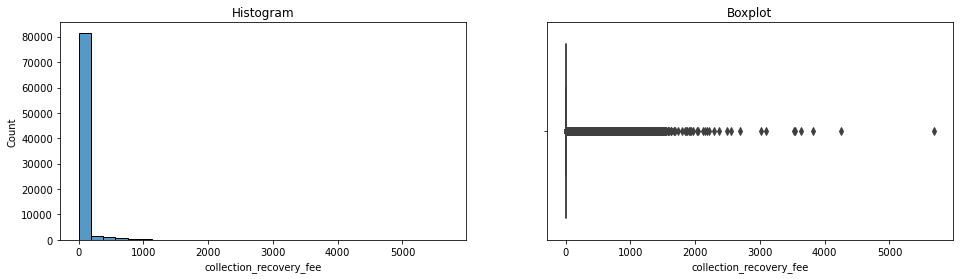


Skewness Value :  7.557162297116488


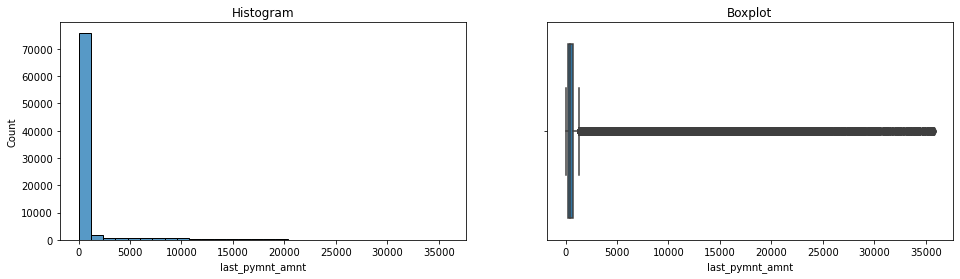


Skewness Value :  4.6724178615080705


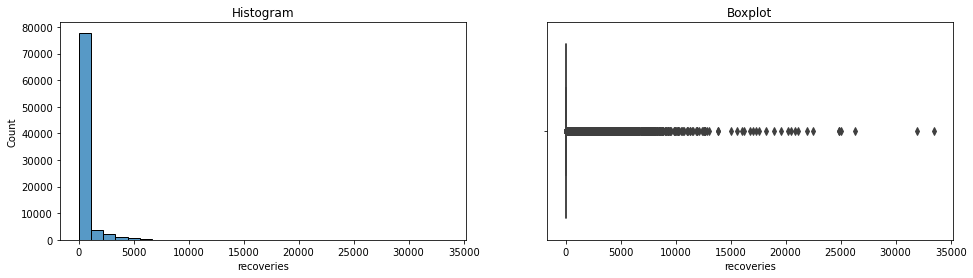


Skewness Value :  6.51713684251851


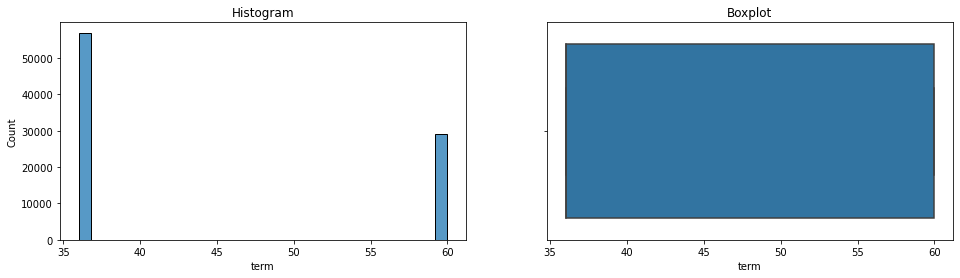


Skewness Value :  0.6867157167377856


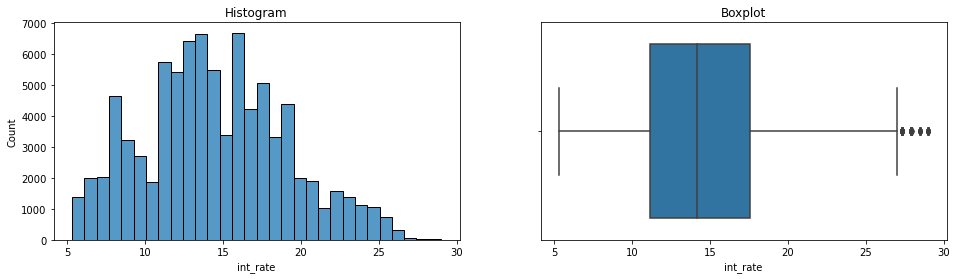


Skewness Value :  0.27226393131646126


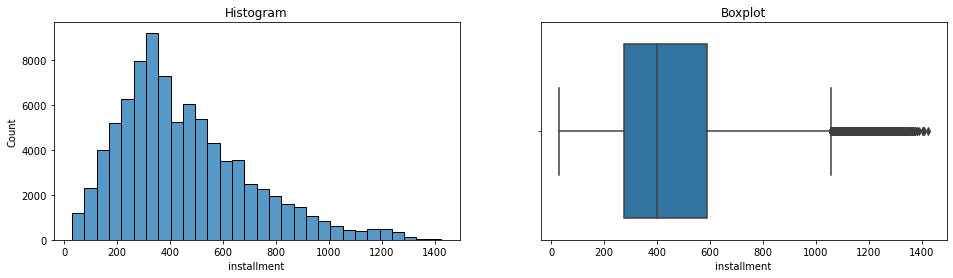


Skewness Value :  0.9332547191046295


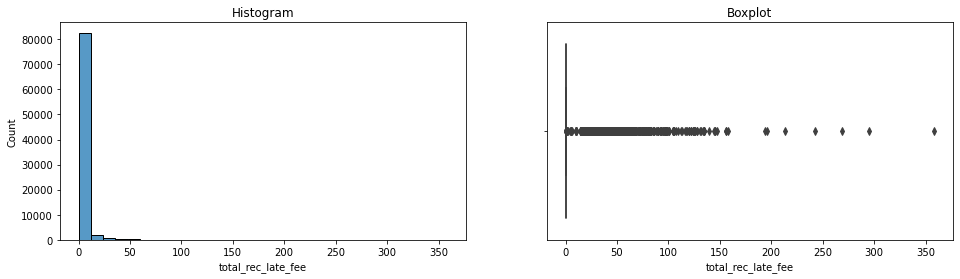


Skewness Value :  11.093549812109138


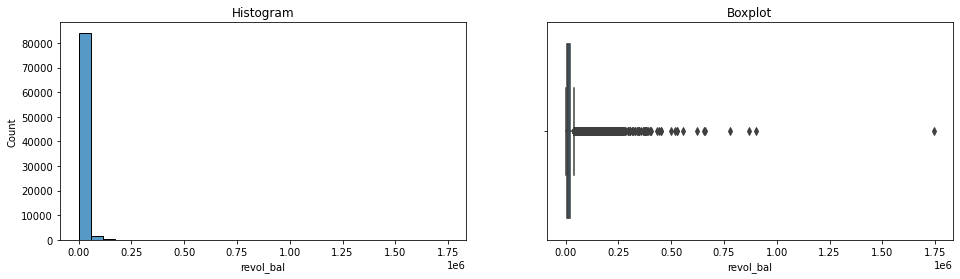


Skewness Value :  15.191842385561676


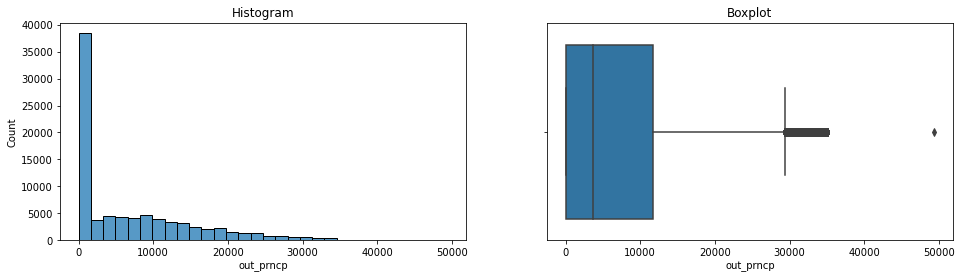


Skewness Value :  1.1673600754180637


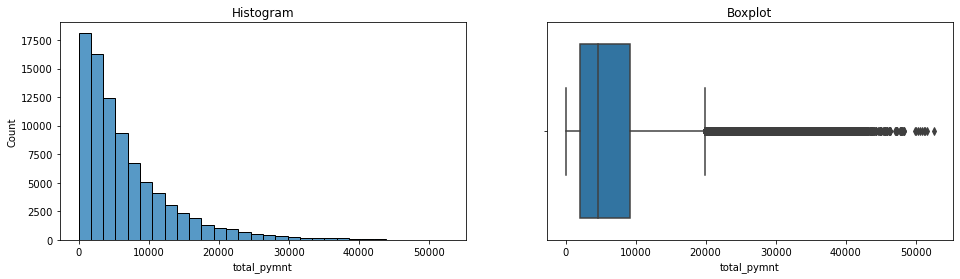


Skewness Value :  1.97027450516476


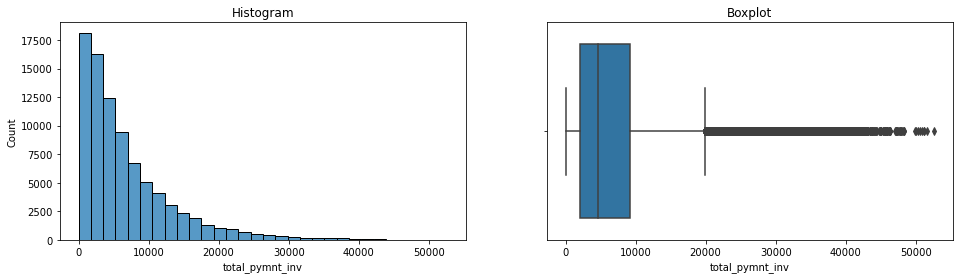


Skewness Value :  1.9703466370604579


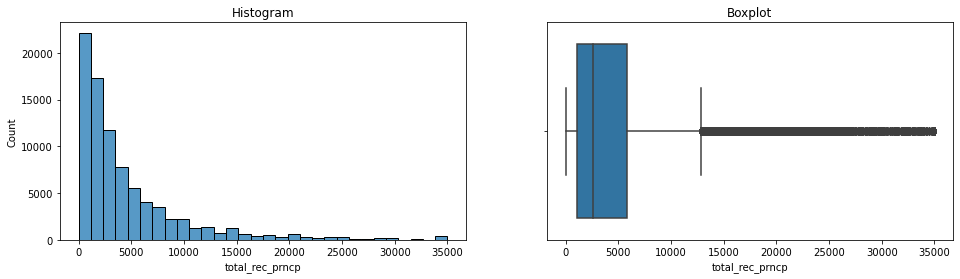


Skewness Value :  2.4804194546858476


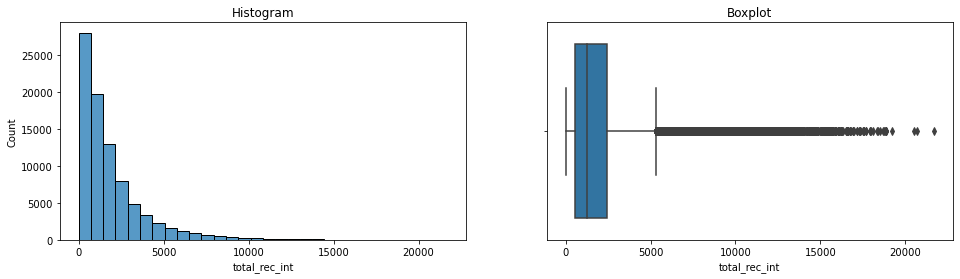


Skewness Value :  2.465732961747571


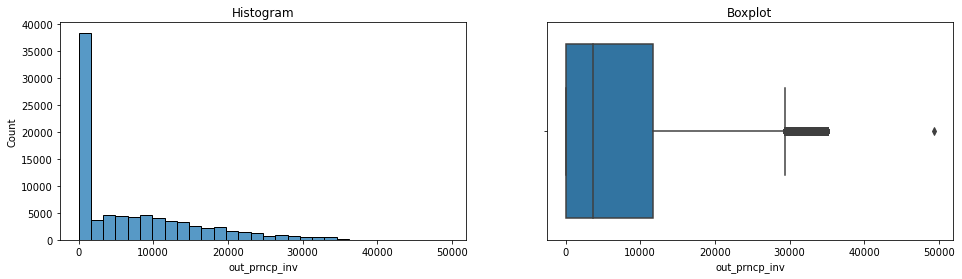


Skewness Value :  1.1672045074301218


In [97]:
# For loop to create visualization for all features.
for variable in X_train_num.columns:
    diagnostic_plots(X_train_num,variable)

In short, no handling done.

### e. Preprocessing Pipeline

In [98]:
#concatting the final X train for pipe line
X_train_pipe_final = pd.concat([X_train_num.reset_index(drop=True),X_train_ordinal.reset_index(drop=True),X_train_nominal.reset_index(drop=True)], axis=1)

scaler = MinMaxScaler()
onehot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

num_col = X_train_num.columns.values
nominal_cat_col = X_train_nominal.columns.values
ordinal_col = X_train_ordinal.columns.values

nominal_pipe = Pipeline([
    ('nominal_encode',OneHotEncoder())])

num_pipe = Pipeline([
    ('scaling',MinMaxScaler())])

ordinal_pipe = Pipeline([('ordinal_encode',OrdinalEncoder())])

preprocess = ColumnTransformer([
    ('nom',nominal_pipe,nominal_cat_col),
    ('num',num_pipe,num_col),
    ('ordinal',ordinal_pipe,ordinal_col)])
    

pipe = Pipeline(steps=[("preprocess", preprocess), ("model", lgbm)])

pipe.fit(X_train_pipe_final)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('nominal_encode',
                                                                   OneHotEncoder())]),
                                                  array(['home_ownership', 'purpose', 'initial_list_status'], dtype=object)),
                                                 ('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'total_acc', '...
       'last_pymnt_amnt', 'recoveries', 'term', 'int_rate', 'installment',
       'total_rec_late_fee', 'revol_bal', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'out_prncp_inv'], dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  array(['emp_length', 'verification_status', 'grade', 'sub_grade'],
      dtype=object))]))])

In [99]:
transform_X_train = pipe.transform(X_train_pipe_final)
X_train_final = pd.DataFrame(transform_X_train)
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.394556,0.049092,0.049092,0.031275,0.068659,0.394556,1.0,0.0,4.0,20.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.366133,0.133920,0.133774,0.140656,0.098050,0.365735,10.0,1.0,2.0,12.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.057336,0.057336,0.060399,0.041690,0.000000,1.0,0.0,1.0,9.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.050804,0.050804,0.056934,0.019753,0.000000,7.0,0.0,0.0,4.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.089238,0.069048,0.069048,0.074116,0.047982,0.089238,10.0,1.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85983,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.008563,0.052321,0.052321,0.056492,0.035824,0.008563,0.0,2.0,3.0,19.0
85984,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.092165,0.091210,0.091210,0.085701,0.083062,0.092165,2.0,1.0,4.0,21.0
85985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.441461,0.279419,0.279419,0.234394,0.299857,0.441461,1.0,2.0,2.0,11.0
85986,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.011263,0.011263,0.011991,0.007985,0.000000,0.0,1.0,2.0,10.0


In [100]:
X_test_num = X_test.drop(['emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status'], axis=1)
X_test_ordinal = X_test[['emp_length', 'verification_status', 'grade', 'sub_grade']]
X_test_nominal = X_test[['home_ownership', 'purpose', 'initial_list_status']]

X_test_num.replace({' 36 months':36, ' 60 months':60}, inplace=True)

X_test_pipe_final = pd.concat([X_test_num.reset_index(drop=True),X_test_ordinal.reset_index(drop=True),X_test_nominal.reset_index(drop=True)], axis=1)

transform_X_test = pipe.transform(X_test_pipe_final)
X_test_final = pd.DataFrame(transform_X_test)
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.439108,0.028366,0.028366,0.023428,0.031033,0.439108,1.0,0.0,2.0,11.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.194197,0.019586,0.019586,0.011769,0.028535,0.194197,1.0,2.0,4.0,22.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.168548,0.085843,0.085843,0.105095,0.038766,0.168548,1.0,1.0,0.0,4.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.136702,0.136702,0.099759,0.092550,0.000000,7.0,0.0,3.0,18.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.157455,0.103367,0.103367,0.120743,0.056041,0.157455,1.0,0.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154789,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.467671,0.044178,0.044178,0.054564,0.019180,0.467671,2.0,1.0,0.0,1.0
154790,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.695224,0.034411,0.034411,0.019280,0.052388,0.695224,1.0,1.0,4.0,24.0
154791,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.536084,0.079797,0.079797,0.032343,0.141429,0.536084,5.0,2.0,6.0,32.0
154792,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.205842,0.205842,0.285714,0.038592,0.000000,1.0,1.0,1.0,8.0


## VI. Machine Learning Model

### A. Random Forest

#### 1. Model Definition

In [ ]:
# Parameters to be tested. Reference: https://bit.ly/3S5AHLS
param_grid_rnd = {'criterion' : ['gini', 'entropy', 'log_loss'], 'n_estimators': [200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 10], 'max_features' : ['auto', 'sqrt', 'log2'], 'min_samples_leaf' : [1, 2, 3, 4, 5, 6]}

# Defining Model to be used.
rnd_gridcv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rnd, n_jobs=-1)

# Training dataset.
rnd_gridcv.fit(X_train_final, y_train)

In [249]:
# Defining Random Tree model with best hyperparameters. We are using random_state=0 here to prevent changes in output when the code is re-runned.
model_random_forest = RandomForestClassifier(criterion = 'entropy', n_estimators=100, max_depth = 10, max_features = 'sqrt', min_samples_leaf=1, random_state=42)

#### 2. Model Training

In [250]:
model_random_forest.fit(X_train_final, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

#### 3. Model Evaluation

In [278]:
y_train_random_forest_proba = model_random_forest.predict_proba(X_train_final)
y_test_random_forest_proba = model_random_forest.predict_proba(X_test_final)

In [279]:
y_pred_train_random_forest = model_random_forest.predict(X_train_final)
y_pred_test_random_forest = model_random_forest.predict(X_test_final)

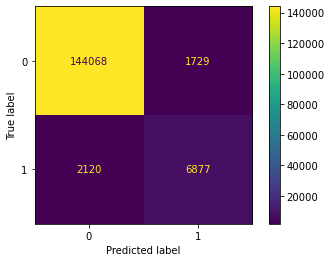

In [280]:
cm_rnd = confusion_matrix(y_test, y_pred_test_random_forest, labels=model_random_forest.classes_)
disp_rnd = ConfusionMatrixDisplay(confusion_matrix=cm_rnd,display_labels=model_random_forest.classes_)

disp_rnd.plot()
plt.show()

In [281]:
print(classification_report(y_train,y_pred_train_random_forest))
print('Train ROC-AUC Score: ', roc_auc_score(y_train, y_train_random_forest_proba[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     50000
           1       0.99      0.77      0.86     35988

    accuracy                           0.90     85988
   macro avg       0.92      0.88      0.89     85988
weighted avg       0.91      0.90      0.90     85988

Train ROC-AUC Score:  0.9499619111926197


In [282]:
print(classification_report(y_test,y_pred_test_random_forest))
print('Test ROC-AUC Score: ', roc_auc_score(y_test, y_test_random_forest_proba[:,1]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    145797
           1       0.80      0.76      0.78      8997

    accuracy                           0.98    154794
   macro avg       0.89      0.88      0.88    154794
weighted avg       0.97      0.98      0.97    154794

Test ROC-AUC Score:  0.941726123408151


### b. Decision Tree

#### 1. Model Definition

In [442]:
# Parameters to be tested. Reference: https://bit.ly/3f281ol
param_grid_tree = {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth': [2, 3, 4, 5, 6, 7, 10], 'max_features' : ['auto', 'sqrt', 'log2'], 'min_samples_leaf' : [1, 2, 3, 4, 5, 6]}

# Defining Model to be used.
tree_gridcv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, n_jobs=-1)

# Training dataset.
tree_gridcv.fit(X_train_bal, y_train_bal)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6]})

In [443]:

print(tree_gridcv.best_params_)

{'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 6}


In [131]:
tree_clf = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 10, max_features = 'auto', min_samples_leaf=6, random_state=42)

#### 2. Model Training

In [132]:
tree_clf.fit(X_train_final, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='auto',
                       min_samples_leaf=6, random_state=42)

#### 3. Model Evaluation

In [133]:
y_train_tree_prob = tree_clf.predict_proba(X_train_final)
y_test_tree_prob = tree_clf.predict_proba(X_test_final)

In [134]:
y_pred_train_tree = tree_clf.predict(X_train_final)
y_pred_test_tree = tree_clf.predict(X_test_final)

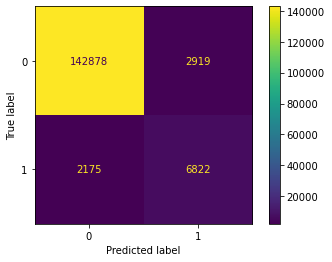

In [135]:
cm_tree = confusion_matrix(y_test, y_pred_test_tree, labels=tree_clf.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=tree_clf.classes_)

disp_tree.plot()
plt.show()

In [136]:
print(classification_report(y_train,y_pred_train_tree))
print('Train ROC-AUC Score: ', roc_auc_score(y_train, y_train_tree_prob[:,1]))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     50000
           1       0.97      0.76      0.85     35988

    accuracy                           0.89     85988
   macro avg       0.91      0.87      0.88     85988
weighted avg       0.90      0.89      0.89     85988

Train ROC-AUC Score:  0.9388825430699121


In [137]:
print(classification_report(y_test,y_pred_test_tree))
print('Test ROC-AUC Score: ', roc_auc_score(y_test, y_test_tree_prob[:,1]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    145797
           1       0.70      0.76      0.73      8997

    accuracy                           0.97    154794
   macro avg       0.84      0.87      0.86    154794
weighted avg       0.97      0.97      0.97    154794

Test ROC-AUC Score:  0.9343811844327236


### c. AdaBoost

#### 1. Model Definition

In [425]:
model_ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200, learning_rate=0.5, random_state=42)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=42)

#### 2. Model Training

In [ ]:
model_ada_boost.fit(X_train_final, y_train)

#### 3. Model Evaluation

In [430]:
y_train_predict_ada_boost = model_ada_boost.predict(X_train_final)
y_test_predict_ada_boost = model_ada_boost.predict(X_test_final)

y_train_predict_proba_ada_boost = model_ada_boost.predict_proba(X_train_final)
y_test_predict_proba_ada_boost = model_ada_boost.predict_proba(X_test_final)

print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_ada_boost[:, 1]))
print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_ada_boost[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_train_predict_ada_boost))
print('='*10,'Classification Report test','='*10)
print('DecisionTreeClassifier \n', classification_report(y_test, y_test_predict_ada_boost))

ROC AUC score train :  0.9699960020006668
ROC AUC score test :  0.9493941381597426
========== Classification Report train ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     50000
           1       0.98      0.80      0.88     35988

    accuracy                           0.91     85988
   macro avg       0.93      0.90      0.91     85988
weighted avg       0.92      0.91      0.91     85988

========== Classification Report test ==========
DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    145797
           1       0.72      0.79      0.76      8997

    accuracy                           0.97    154794
   macro avg       0.86      0.89      0.87    154794
weighted avg       0.97      0.97      0.97    154794



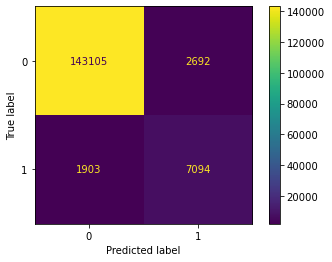

In [432]:
cm_ada2 = confusion_matrix(y_test, y_test_predict_ada_boost, labels=model_ada_boost.classes_)
disp_ada2 = ConfusionMatrixDisplay(confusion_matrix=cm_ada2,display_labels=model_ada_boost.classes_)

disp_ada2.plot()
plt.show()

### d. LightGBM

#### 1. Model Definition

In [ ]:
# Train with Grid Search

# Parameters to be tested.
param_grid_lgbm = {'boosting_type' : ['gbdt', 'dart', 'goss', 'rf'], 'max_depth': [2, 3, 4, 5, 6, 7, 10], 'learning_rate': [0.01, 0.1, 0.5, 0.7, 0.9, 1],
'num_leaves': [4, 14, 34, 64, 100], 'lambda_l1' : [2, 12, 42, 62, 100], 'max_bin' : [4, 14, 34, 64, 100], 'n_estimators': [200, 300, 500]}

# Defining Model to be used.
lgbm_gridcv = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_lgbm, n_jobs=-1)

# Training dataset.
lgbm_gridcv.fit(X_train_final, y_train)

In [ ]:
print(lgbm_gridcv.best_estimator_)

In [368]:
lgbm = LGBMClassifier(boosting_type='gbdt', learning_rate= 0.1, n_estimators=300, num_leaves= 50, random_state=42)

#### 2. Model Training

In [369]:
lgbm.fit(X_train_final, y_train)

LGBMClassifier(n_estimators=300, num_leaves=50, random_state=42)

#### 3. Model Evaluation

In [370]:
y_train_lgbm_prob = lgbm.predict_proba(X_train_final)
y_test_lgbm_prob = lgbm.predict_proba(X_test_final)

In [371]:
y_pred_train_lgbm = lgbm.predict(X_train_final)
y_pred_test_lgbm = lgbm.predict(X_test_final)

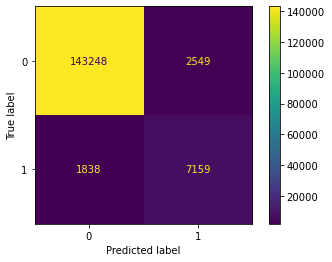

In [372]:
cm_lgbm = confusion_matrix(y_test, y_pred_test_lgbm, labels=lgbm.classes_)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm,display_labels=lgbm.classes_)

disp_lgbm.plot()
plt.show()

In [373]:
print(classification_report(y_train,y_pred_train_lgbm))
print('Train ROC-AUC Score: ', roc_auc_score(y_train, y_train_lgbm_prob[:,1]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     50000
           1       1.00      0.86      0.92     35988

    accuracy                           0.94     85988
   macro avg       0.95      0.93      0.94     85988
weighted avg       0.94      0.94      0.94     85988

Train ROC-AUC Score:  0.9916060097810381


In [375]:
print(classification_report(y_test,y_pred_test_lgbm))
print('Test ROC-AUC Score: ', roc_auc_score(y_test, y_test_lgbm_prob[:,1]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    145797
           1       0.74      0.80      0.77      8997

    accuracy                           0.97    154794
   macro avg       0.86      0.89      0.88    154794
weighted avg       0.97      0.97      0.97    154794

Test ROC-AUC Score:  0.9558180973342776


### e. XGBoost

In [ ]:
model_xgboost = XGBClassifier(eta=0.9, subsample=0.5, max_depth=7, n_estimators=200, random_state=42)
model_xgboost.fit(X_train_final, y_train)

y_train_predict_proba_xgboost = model_xgboost.predict_proba(X_train_final)
y_test_predict_proba_xgboost = model_xgboost.predict_proba(X_test_final)

y_predict_train_xgboost = model_xgboost.predict(X_train_final)
y_predict_test_xgboost = model_xgboost.predict(X_test_final)

In [ ]:
print('ROC AUC score train : ', roc_auc_score(y_train, y_train_predict_proba_xgboost[:, 1]))
print('ROC AUC score test : ', roc_auc_score(y_test, y_test_predict_proba_xgboost[:, 1]))

print('='*10, 'Classification Report train','='*10)
print('DecisionTreeClassifier \n', classification_report(y_train, y_predict_train_xgboost))
print('='*10,'Classification Report test','='*10)
print('DecisionTreeClassifier \n', classification_report(y_test, y_predict_test_xgboost))

## VII. Model Inference

## VIII. Model Saving

In [398]:
pipe = Pipeline(steps=[("preprocess", preprocess),
                        ("model", LGBMClassifier(boosting_type='gbdt', learning_rate= 0.1, n_estimators=300, num_leaves= 50, random_state=42))])

In [399]:
pipe.fit(X_train_pipe_final, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('nominal_encode',
                                                                   OneHotEncoder())]),
                                                  array(['home_ownership', 'purpose', 'initial_list_status'], dtype=object)),
                                                 ('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'total_acc', '...
       'total_rec_late_fee', 'revol_bal', 'out_prncp', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'out_prncp_inv'], dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  array(['emp_length', 'verification_status', 'grade', 'sub_grade'],
      dtype=object))])),
                ('model',
                 LGBMClassifier(n_estimators=300, num_leaves=50,
                                random_state=42))])

In [400]:
pickle.dump(pipe, open('finpro_preproc_model.pkl', 'wb'))

## IX. Conclusion & Recommendation